# A little experience solving linear and nonlinear IVPs with a 4th order Runge-Kutta Method

This Jupyter notebook is designed to help you learn a little moe about the numerical solution of initial value problems (ODEs).  The 4th order Runge-Kutta is quite an upgrade from the 1st order Euler method you tried before.  The formula provides an accuracy equivalent to a 4th order Taylor series approximation to derivatives. See the notes on the Numerical Solution of Differential Equations on the website for more.

The algorithm is as follows:

1. Define Equation(s) to be solved. This will be a 1st order ODE or system of ODEs. 
2. Define or input appropriate control parameters (such as the length of time for the integration and the tolerance for convergence).
3. Define the vector of initial conditions -- value(s) of the function at time = 0
4. Call the ODE solver
5. Plot your results


In [208]:
import numpy as np
import matplotlib.pyplot as plt

# Define some global variables

In [209]:
global a, b

a = -1 #a constant
b = 1 #a power law exponent; b=1 implies a linear system with (here) an exponential solution


A global variable can be passed to all called functions; 'a' and 'b' are constants in the ODE in the function 'oneode.ipynb': $dy/dt = -a*y^b$.  Be careful using global variables generally. 

NOTE: if $b = 1$ then this ode is linear and the analytical solution can be obtained by separation of variables (this is raddioactive decay): $y(t) =\exp(-at)$ 

The larger or smaller $b$ is compared to 1, the more nonlinear are the equations to be solved.  In the coupled ode example the nonlinear coupling has a large effect-- Increase or decrease $b$ from 1 with small steps and explore the behavior; You may have to increase the number of time steps below to achieve resolution.


# Define functions

In [210]:
#Define a function for the 4th order Runge-Kutta integration method and the ODEs to be solved. 

def rk4(fxy, x0, xf, y0, N):
    
    # The inputs to the function are:
    #         fxy = the name of the function containing f(x,y) (e.g. oneode, twoode)
    #         xo,xf = initial and final values of the independent variable (integers or floats)
    #         yo = initial value of dependent variable at xo (numpy array)
    #         N = number of intervals to use between xo and xf (integer)

    # The outputs to the function are:
    #         X = numpy array containing values of the independent variable
    #         Y = the estimated dependent variable at each value of the independent variable
    #         --> this variable is a 1D numpy array if only one equation is solved
    #         --> it is an M-D numpy array [y1(x) y2(x) ... ] for multiple (M) equations 

    #compute step size and size of output variables
    if N < 2:
        N = 2 #set minimum number for N
    h = (xf - x0) / N
    X = np.zeros((N+1, 1))
    M = np.max(np.shape(y0))
    Y = np.zeros((N+1, M))*1j #make complex by multiplying by 1j; this way can add complex values to this during integration

    #set initial conditions
    x = x0
    X[0] = x
    y = [complex(val) for val in y0]  #make complex
    Y[0,:] = y
    
    #begin computational loop
    for ii in range(N):
        
        k1 = np.array([h * val for val in fxy(x,y)]) #evaluate function fxy; depending on equation, k1-4 can be complex; this is why we make Y and y complex as well
        k2 = np.array([h * val for val in fxy(x+h/2, y+k1/2)])
        k3 = np.array([h * val for val in fxy(x+h/2, y+k2/2)])
        k4 = np.array([h * val for val in fxy(x+h, y+k3)])
        
        y += (k1 + 2*k2 + 2*k3 + k4) / 6.
        x += h
        X[ii+1] = x
        Y[ii+1,:] = y

        # print(f"\n\nKs:: {ii} ::  {k1}   {k2}   {k3}   {k4} ")
        # print(f"vals in fxy(x,y): {fxy(x,y)}")
        # print(f"{Y}")

    
    # print(f"deltaT: {h}\nt_0: {x0}\ntmax: {xf}\ny_0: {y0}\n")

    print(f"Y: {Y}")

    return X, Y

def oneode(t,y):
    
    # input:
    #     t: float
    #     y: numpy array with one value

    # output:
    #     ydot: numpy array of same size as y
    
    global a, b #we are bringing a defined in the main program.
    ydot = np.array([a * y[0]**b])
    
    return ydot

def twoodes(t,y):
    
    # input:
    #     t: float
    #     y: numpy array with length = number of equations being solved

    # output:
    #     ydot: numpy array of same size as y
    #            made of complex values because np.power(negative, fraction) returns nan, but np.power(negative, fraction, dtype = np.complex128) returns a complex value

    global a, b #we are bringing a defined in the main program.
    ydot = np.array([a*np.power(y[1],b, dtype = np.complex128), -a*np.power(y[0],b, dtype = np.complex128)]);
    
    print("TWOODES!!")

    return ydot

def fourodes(t,y):

    global a,b
    ydot = np.array([y[1],y[2],y[3],(1/y[1])*(t - (y[2]**2))])

    return ydot

# Let's do some calculations!

In [211]:
#Constants, Integration time, time steps and initial conditions: This information could be contained in a separate input file that you call


#time interval for integration
time_min = 0
time_max = 6

#define a linearly-spaced vector with n points
n = 1000
timespan = -np.linspace(time_min, time_max, n)

#array of initial conditions defined in the function 'oneode.ipynb'
y0 = np.array([100.])

#array of initial conditions defined in the function 'twoodes.ipynb'
yy0 = np.array([100.,100.])

y4_0 = np.array([100.,100.,100.,100])



In [212]:
# [t,y] = rk4(fxy = oneode,
#            x0 =  time_min,
#            xf = time_max,
#            y0 = y0,
#            N = n)

In [213]:
[tt,yy] = rk4(fxy = twoodes,
           x0 =  -10,
           xf = 0,
           y0 = yy0,
           N = n)

TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!
TWOODES!!


In [214]:
[t4, y4] = rk4(fxy=fourodes,
               x0=-10,
               xf=-5,
               y0=y4_0,
               N=n)

Y: [[ 100.        +0.j  100.        +0.j  100.        +0.j  100.        +0.j]
 [ 100.50125208+0.j  100.50124791+0.j  100.49874668+0.j   99.49825763+0.j]
 [ 101.00501662+0.j  101.00498328+0.j  100.99497848+0.j   98.99405555+0.j]
 ...
 [1752.33223431+0.j  318.94042967+0.j -139.90805442+0.j -106.27421746+0.j]
 [1753.92518539+0.j  318.23955969+0.j -140.44019537+0.j -106.58266723+0.j]
 [1755.51462546+0.j  317.53602514+0.j -140.97388615+0.j -106.89415265+0.j]]


In [215]:
# plt.plot(t,y)
# plt.xlabel('Time')
# plt.ylabel('y')
# plt.title('One ODE Solution')

# plt.show()

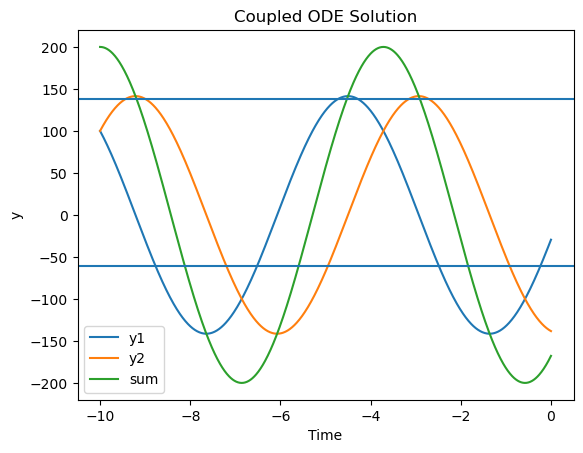

In [216]:
plt.plot(tt,yy[:,0], label = 'y1')
plt.plot(tt,yy[:,1], label = 'y2')
plt.plot(tt, yy[:,0] + yy[:,1], label = 'sum')

plt.axhline(y=138)
plt.axhline(y=-60.8)

plt.xlabel('Time')
plt.ylabel('y')
plt.title('Coupled ODE Solution')
plt.legend()

plt.show()

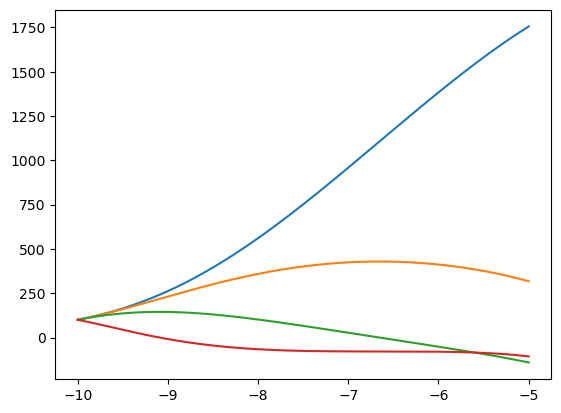

In [217]:
plt.plot(t4,y4[:,0])
plt.plot(t4,y4[:,1])
plt.plot(t4,y4[:,2])
plt.plot(t4,y4[:,3])

# Try some experiments

Some ideas: Vary the values for b.  Vary the values for b in each of the ODEs in the two-ode example.  Add constant ore time-vaying source terms to the ODEs. Compare results with what you got using the Euler method for vaious time steps. Add more ODEs. Follow your nose.

In [218]:
L = 1
yyy0 = np.array([1.])
nnn = 12

def OGode(t,y):
    ydot = np.array([-L * y[0]])
    return ydot

In [219]:
[ttt,yyy] = rk4(fxy = OGode,
           x0 =  time_min,
           xf = time_max,
           y0 = yyy0,
           N = nnn)

Y: [[1.        +0.j]
 [0.60677083+0.j]
 [0.36817084+0.j]
 [0.22339533+0.j]
 [0.13554977+0.j]
 [0.08224765+0.j]
 [0.04990547+0.j]
 [0.03028119+0.j]
 [0.01837374+0.j]
 [0.01114865+0.j]
 [0.00676468+0.j]
 [0.00410461+0.j]
 [0.00249056+0.j]]


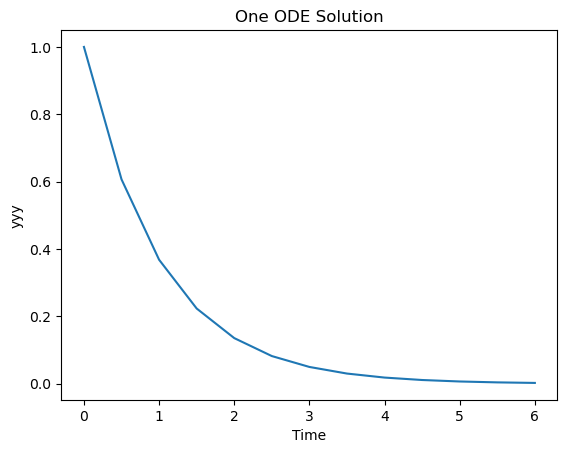

In [220]:
plt.plot(ttt,yyy)
plt.xlabel('Time')
plt.ylabel('yyy')
plt.title('One ODE Solution')

plt.show()

In [221]:
KK = 2
yyyy0 = np.array([1])
nnnn = 3

def OGode(t,y):
    ydot = np.array([-KK * y[0]])
    return ydot


[tttt,yyyy] = rk4(fxy = OGode,
           x0 =  0,
           xf = 6,
           y0 = yyyy0,
           N = nnnn)

Y: [[  1.+0.j]
 [  5.+0.j]
 [ 25.+0.j]
 [125.+0.j]]


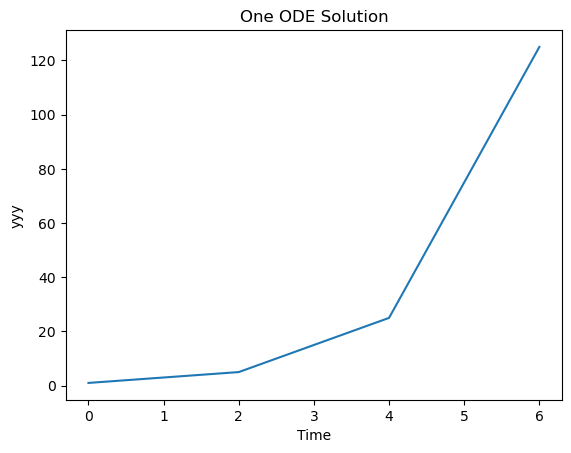

In [222]:
plt.plot(tttt,yyyy)
plt.xlabel('Time')
plt.ylabel('yyy')
plt.title('One ODE Solution')

plt.show()